# Caption generator retrieval accuracy
Here we will analyse the results obtained from the retrieval.py script in which we tested our caption generator's retrieval performance on the levels described in ../level_generator/PythonAPI/level_analysis.ipynb

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
#Loading results
with open('ic_performance_results.pkl', 'rb') as input:
    results = pickle.load(input)

The results dictionary are structured by number of images in the level (n), by number of common objects shared by those images (c), and then by a list of length 50 in which a successful retrieval is coded as a 1 whereas a failure is indicated by a 0.

In [2]:
print(results.keys())
print()
print(results[3].keys())
print()
print(len(results[3][4]))
print()
print(results[3][4][16])

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10])

dict_keys([1, 2, 3, 4, 5])

50

0


## Retrieving average accuracy

In [3]:
tot = 0
ones = 0
for n in results.keys():
    for c in results[n].keys():
        for r in results[n][c]:
            tot +=1
            if r == 1:
                ones +=1
print("Our system's average accuracy over all levels is: ", round(ones/tot, 3))

Our system's average accuracy over all levels is:  0.202


## Plotting all our results 
Red line = baseline of choosing an image at random.

In [4]:
accs = []
tots = []
for n in results.keys():
    temp_accs = []
    temp_tots = []
    for c in results[n].keys():
        temp_ones = np.sum(results[n][c])
        temp_tot = len(results[n][c])
        temp_accs.append(round(temp_ones/temp_tot, 4))
        temp_tots.append(temp_tot)   
    accs.append(temp_accs)
    tots.append(temp_tots)

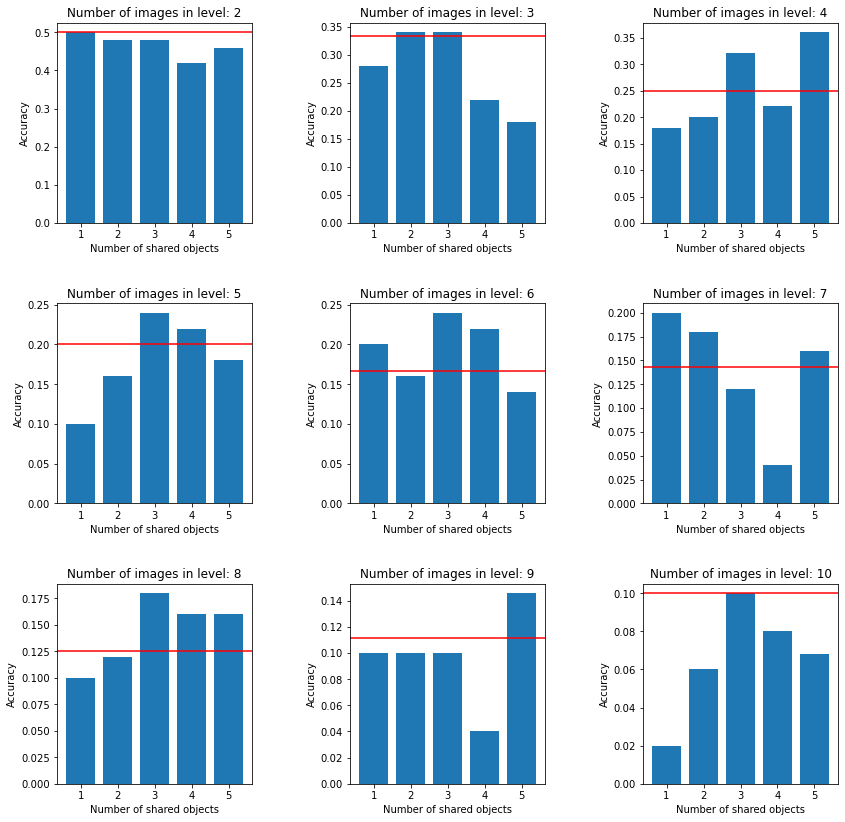

In [23]:
fig = plt.figure(figsize = (14, 14))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    ax.bar(range(1, 6), accs[i])
    ax.axhline(1/(i+2), color='red')
    #plt.legend(bbox_to_anchor=(1.05, 1))
    #ax.xlabel('Test instance')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Number of shared objects')
    ax.title.set_text('Number of images in level: '+ str(i+2))
plt.subplots_adjust(wspace = 0.5, hspace = 0.4)
plt.show()